# Imports

In [1]:
#!pip install opencv-python

In [27]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.patches as patches
from PIL import Image, ImageDraw
from scipy import misc

In [3]:
pwd

'C:\\Users\\Mobassir Hossen'

In [4]:
data_dir = 'C:\\Users\\Mobassir Hossen\\Downloads\\icdar data'

os.listdir(data_dir)

['End to End 2015',
 'text localization 2013',
 'Text Segmentation 2013',
 'word recognition 2013']

# First we will work on text localization 2013 dataset

In [5]:
text_loc = 'C:\\Users\\Mobassir Hossen\\Downloads\\icdar data\\text localization 2013'
os.listdir(text_loc)

['dataset.txt', 'test_gt', 'test_img', 'train_gt', 'train_img']

# About this dataset

In [6]:
f = open(text_loc+"\\dataset.txt", "r")
print(f.read())

Task 2.1: Text Localization (2013 edition)
Training Set
Training Set Images (142Mb). - 229 images that comprise the training dataset.

Training Set Text Localization Ground Truth (39Kb). - 229 Text files (one per image) as explained in the "Tasks" section.

Test Set
Test Set Images (112Mb). - 233 images that comprise the test set for tasks 2.1, 2.2 and 2.4. You can submit your results for this Task over the images of the test set through the My Methods section.

Test Set Ground Truth (46Kb). - 233 text files with text localisation bounding boxes for the images of the test set.


# Explore train_img folder

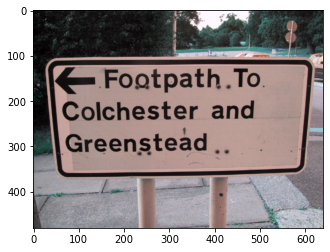

In [7]:
train_img = text_loc+"\\train_img"
img = cv2.imread(train_img+"\\100.jpg")

img_gray = cv2.imread(train_img+"\\100.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

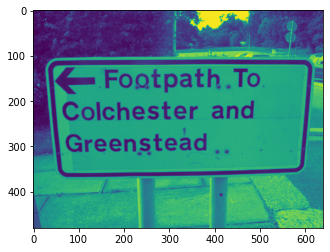

In [8]:
plt.imshow(img_gray)

# let's draw all the bounding boxes of this image from train_gt folder's gt_100.txt files annotation

In [9]:
train_gt = text_loc+"\\train_gt"
f = open(train_gt+"\\gt_100.txt", "r")
print(f.read())

158 128 411 181 "Footpath"
443 128 501 169 "To"
64 200 363 243 "Colchester"
394 199 487 239 "and"
72 271 382 312 "Greenstead"



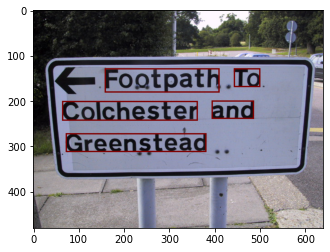

In [10]:
'''
158 128 411 181 "Footpath"
443 128 501 169 "To"
64 200 363 243 "Colchester"
394 199 487 239 "and"
72 271 382 312 "Greenstead"
'''

im = Image.open(train_img+"\\100.jpg")  #443 128 501 169
draw = ImageDraw.Draw(im) 
draw.rectangle((158,128, 411,181), width = 3,outline = 128)
plt.imshow(im)

draw.rectangle((443,128, 501,169), width = 3,outline = 128)
plt.imshow(im)

draw.rectangle((64,200, 363,243), width = 3,outline = 128)
plt.imshow(im)

draw.rectangle((394,199, 487,239), width = 3,outline = 128)
plt.imshow(im)

draw.rectangle((72,271, 382,312), width = 3,outline = 128)
plt.imshow(im)

now we have 2 more folders left localization data,they are "test_img" and "test_gt" and if you explore them then you will see the test images and corresponding annotations are done in similar fashion as shown in above visualizations,we have 4 points for each word,first 2 points for upper leftmost corner of rectangle and last 2 points for lower rightmost corner of rectangle in image coordinate system

# Exploring Text Segmentation 2013 Dataset

In [11]:
text_seg = data_dir + '\\Text Segmentation 2013'

os.listdir(text_seg)

['Challenge2_Test_Task12_Images',
 'Challenge2_Test_Task2_GT',
 'Challenge2_Training_Task12_Images',
 'Challenge2_Training_Task2_GT',
 'seg data.txt']

# About the dataset and task

In [12]:
f = open(text_seg+"\\seg data.txt", "r")
print(f.read())

Training Set
Training Set Images (142Mb). - 229 images that comprise the training dataset. This is the same dataset as for Task 2.1.

Training Set Text Segmentation Ground Truth (3Mb). - 229 colour-coded images and corresponding text files as explained in the "Tasks" section.

Test Set
Test Set Images (112Mb). - 233 images that comprise the test set for tasks 2.1, 2.2 and 2.4. You can submit your results for this Task over the images of the test set through the My Methods section.

Test Set Ground Truth (1.5Mb). - 233 colour coded image corresponding to the images of the test set. Each colour marks a different atom - white is background.


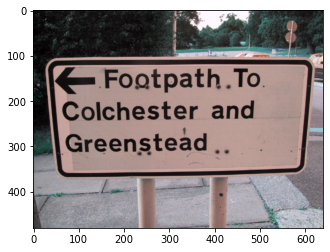

In [16]:
challenge2_img = text_seg + '\\Challenge2_Training_Task12_Images'

img = cv2.imread(challenge2_img+"\\100.jpg")

img_gray = cv2.imread(challenge2_img+"\\100.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img)


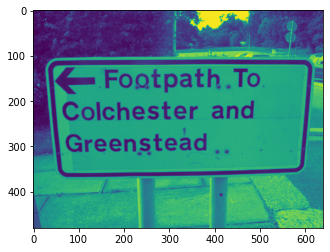

In [17]:
plt.imshow(img_gray)

# we can see we have same image for segmentation task in Challenge2_Training_Task12_Images folder

In [18]:
#let's see ground truth annotation and image

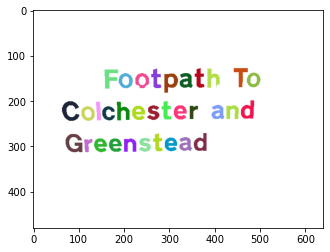

In [31]:
challenge2_gt = text_seg + '\\Challenge2_Training_Task2_GT'

img = Image.open(challenge2_gt+"\\100_GT.bmp")

plt.imshow(img)


# Annotation

In [33]:
f = open(challenge2_gt+"\\100_GT.txt", "r")
print(f.read())



108 225 132 168 147 158 131 187 172 "F"
82 174 214 204 155 189 139 219 171 "o"
241 73 144 240 154 226 139 255 171 "o"
135 60 219 271 151 261 129 282 171 "t"
153 62 12 302 157 290 140 319 181 "p"
13 94 36 337 155 324 139 351 170 "a"
183 6 28 366 150 357 128 377 170 "t"
179 222 71 395 149 385 129 411 170 "h"

200 77 18 457 142 443 128 473 169 "T"
139 187 67 486 153 472 138 501 169 "o"

31 37 56 80 221 64 201 101 243 "C"
203 212 93 120 227 107 212 135 243 "o"
245 150 252 144 222 139 202 149 242 "l"
19 59 69 165 226 153 212 180 242 "c"
10 137 13 196 223 185 202 212 242 "h"
174 219 28 232 225 219 211 246 241 "e"
154 32 50 265 225 252 210 278 241 "s"
64 238 80 293 221 284 200 304 240 "t"
253 54 120 324 224 311 210 338 240 "e"
50 73 18 351 222 346 211 363 239 "r"

125 158 246 407 224 394 209 421 239 "a"
173 220 73 439 223 427 210 453 239 "n"
242 20 79 474 221 459 199 487 238 "d"

102 64 68 90 293 72 273 108 312 "G"
196 107 208 119 296 113 284 130 312 "r"
50 183 48 148 297 135 283 162 312 "e"


# we have ground truth pixel values of each character and all other pixels are white,means background

# Finally let's check the word recognition 2013 dataset

In [37]:
word_rec = data_dir + '\\word recognition 2013'

os.listdir(word_rec)

['Challenge2_Test_Task3_GT.txt',
 'Challenge2_Test_Task3_Images',
 'Challenge2_Training_Task3_Images_GT',
 'gt.txt',
 'wordData.txt']

In [38]:
f = open(word_rec+"\\wordData.txt", "r")
print(f.read())

Training Set
Training Set Word Images and Ground Truth (80Mb). - 848 images of words cut from the original images and a single text file with the ground truth transcription of all images as specified in the "Tasks" section.

Test Set
Test Set Word Images (81Mb). - 1095 images that comprise the word recognition test set. You can submit your results for this Task over the images of the test set through the My Methods section.

Test Set Ground Truth (25Kb). - A single text file with the transcriptions of the 1095 images of the test set. Each line corresponds to an image of the test set.


# list of words found in Challenge2_Test_Task3_Images folders test images

In [40]:
f = open(word_rec+"\\Challenge2_Test_Task3_GT.txt", "r")
print(f.read())

word_1.png, "Tiredness"
word_2.png, "kills"
word_3.png, "A"
word_4.png, "short"
word_5.png, "break"
word_6.png, "could"
word_7.png, "save"
word_8.png, "your"
word_9.png, "life"
word_10.png, "8"
word_11.png, "H"
word_12.png, "319"
word_13.png, "10"
word_14.png, "Royal"
word_15.png, "London"
word_16.png, "Saeco"
word_17.png, "R"
word_18.png, "ENT"
word_19.png, "ESC"
word_20.png, "Betriebsbereit"
word_21.png, "Produkt"
word_22.png, "wahlen"
word_23.png, "hungry"
word_24.png, "[falling"
word_25.png, "on"
word_26.png, "my"
word_27.png, "knees]"
word_28.png, "Campus"
word_29.png, "Shop"
word_30.png, "Gt."
word_31.png, "Yarmouth"
word_32.png, "Ipswich"
word_33.png, "(A12)"
word_34.png, "Harwich"
word_35.png, "(A120)"
word_36.png, "Clacton"
word_37.png, "A133"
word_38.png, "GASTRONOMY"
word_39.png, "GREEK"
word_40.png, "COOKERY"
word_41.png, "&"
word_42.png, "WINES"
word_43.png, "LOCAL"
word_44.png, "SPECIALTIES"
word_45.png, "FESTIVE"
word_46.png, "RECIPES"
word_47.png, "ILLUSTRATED"
word_48.

# list of words found in Challenge2_Training_Task3_Images_GT folders train images

In [41]:
f = open(word_rec+"\\gt.txt", "r")
print(f.read())

word_1.png, "PROPER"
word_2.png, "FOOD"
word_3.png, "PRONTO"
word_4.png, "professional"
word_5.png, "Java"
word_6.png, "Web"
word_7.png, "Services"
word_8.png, "go"
word_9.png, "SONY"
word_10.png, "create"
word_11.png, "Professional"
word_12.png, "Issues"
word_13.png, "in"
word_14.png, "Software"
word_15.png, "Engineering"
word_16.png, "frank"
word_17.png, "bott"
word_18.png, "allison"
word_19.png, "coleman"
word_20.png, "jack"
word_21.png, "eaton"
word_22.png, "diane"
word_23.png, "rowland"
word_24.png, "ESPANOL-INGLES"
word_25.png, "INGLES-ESPANOL"
word_26.png, "Colgate"
word_27.png, "Fluoride"
word_28.png, "Toothpaste"
word_29.png, "R"
word_30.png, "FOSTER'S"
word_31.png, "FOSTER'S"
word_32.png, "FOSTER'S"
word_33.png, "O"
word_34.png, "F"
word_35.png, "FOSTER'S"
word_36.png, "The"
word_37.png, "SAD"
word_38.png, "SACK"
word_39.png, "Cafe"
word_40.png, "ACCESS"
word_41.png, "TO"
word_42.png, "KNOW"
word_43.png, "BAGGAGE"
word_44.png, "PROFESSIONAL"
word_45.png, "XML"
word_46.png, "2

# train

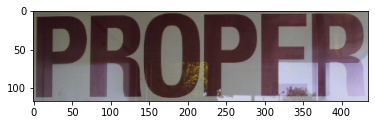

In [44]:

img = Image.open(word_rec+'\\Challenge2_Training_Task3_Images_GT'+"\\word_1.png")

plt.imshow(img)

# Test

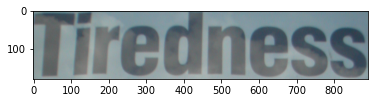

In [45]:

img = Image.open(word_rec+'\\Challenge2_Test_Task3_Images'+"\\word_1.png")

plt.imshow(img)

In [46]:
# ref : https://rrc.cvc.uab.es/?ch=2